## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv', sep=',')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [5]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [25]:
df.query('group == "treatment" and landing_page == "old_page"').count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [27]:
df.query('group == "control" and landing_page == "new_page"').count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [5]:
# Total mismatch
df.query('group == "treatment" and landing_page == "old_page"').count()['user_id'] + df.query('group == "control" and landing_page == "new_page"').count()['user_id']

3893

f. Do any of the rows have missing values?

In [50]:
df[df.isnull().any(axis=1)] # returns the rows with missing valuies

,user_id,timestamp,group,landing_page,converted


In [51]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [3]:
# Removing the rows where  the landing_page and group columns don't align.
df2 = df.drop(df.query('group == "control" and landing_page == "new_page"').index)
df2 = df2.drop(df.query('group == "treatment" and landing_page == "old_page"').index)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [7]:
df2.shape

(290585, 5)

In [7]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [57]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [97]:
#check for duplicates
df2['user_id'].duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [4]:
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [5]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [6]:
df2.drop(2893, axis=0, inplace=True)

In [7]:
# check for duplicates again
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
# since df['converted'] is 1 and 0, we can use mean to calculate to probability
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [98]:
# Group by group and calualate the mean of converted
df2.groupby('group').mean()

,user_id,converted
group,,
control,788164.072594,0.120386
treatment,787845.618446,0.118807


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [36]:
# mean as calculated above is 0.118808

d. What is the probability that an individual received the new page?

In [99]:
# Ratio of the number of user of the new landing_page to the total number of landing_pages viewed
df2[df2['landing_page'] == 'new_page']['landing_page'].count() / df2['landing_page'].count()

0.5000636646764286

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**
The probability of an individual converting to the new landing page regardless of the page they receive is 11.96%
Given that an individual was in the control group, the probability they will be converted to the new page is 12.03%
Given that an individual was in the treatment group, the probability that they will be converted is 11.88%
The probability that an individual received the new page is 50%
Based on the above, there is not sufficient evidence to say that the new treatment page will lead to more conversions.
Moreover the conversion rate for the control group is marginally higher than the treatment group by by around 0.15%. This is not significant enough to indicate the old page is better than the new page and since there is equal chance of a viewer viewing the old and new page, this doesn't give a probability that one does better than the other
**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**
$$ H_0: p_{new} - p_{old} \geq 0$$
According to the null hypothesis, the old page has a higher conversion rate than the new one, which mean the difference between p_old and p_new is greater than or equal to 0

$$ H_1: p_{new} - p_{old} < 0 $$
Alternative hypothesis states that the new page has a higher population conversion rate.
**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [8]:
# Calculating the probability of conversion for new page
p_new = df2[df2['landing_page'] == 'new_page']['converted'].mean()
print("Probability of conversion for new page is {}".format(p_new))

Probability of conversion for new page is 0.11880806551510564


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [12]:
# Calculating the probability of conversion for old page
p_old = df2[df2['landing_page'] == 'old_page']['converted'].mean()
print("Probability of conversion for old page is {}".format(p_old))

Probability of conversion for old page is 0.1203863045004612


In [13]:
# Take the mean of the two probabilities for the probability of conversion under the null hypothesis
p_mean = np.mean([p_new, p_old])
p_mean
print('Probability of conversion under the null hypothesis ',p_mean )

Probability of conversion under the null hypothesis  0.119596776202


In [14]:
# Calculating the difference in mean of the probabilities (p_new and p_old) for the sampling distribution
# (for the alternative hypothesis i.e not for H_0)
p_diff = p_new - p_old
print("Difference in probability of conversion(not under H_0) is {}".format(p_diff))

Difference in probability of conversion(not under H_0) is -0.0015790565976871451


and since this falls under H_1 where p_old and p_new are not equal
hence
** $$ p_{new} = 0.1188 $$
   $$ p_{old} = 0.1204 $$


Quiz 5
a ) p_new under the null.

$$p_{new_0} = p_{old_0} = p_{mean} = 0.119597185008$$

Ans - Based on this assumption in Q2) - Assume under the null hypothesis, p new and p old  
both have "true" success rates equal to the converted success rate regardless of page - that is p new  
and p old are equal

b) p_old under null

Ans - this is also the same

Hence $$p_{new_0} - p_{old_0} = 0$$
**

We want to get p(old) under the null hypothesis, not as we observe it in the data. Consider the whole data, and how p(new) should relate to p(old) under the null.

Remember the null hypothesis states the treatment has no effect on the probability of conversion. So what would we expect p(new) - p(old) to be 0

c. What is $n_{new}$?

In [57]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
n_new, n_old = df2['landing_page'].value_counts()
n_new, n_old

(145311, 145274)

d. What is $n_{old}$?

In [65]:
print('old', n_old, '\nnew', n_new)

old 145274 
new 145310


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [17]:
# Simulating the conversion rates under null hypothesis - H_0
# Store it in new_page_converted
new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, 1-p_new])
new_page_converted.mean()

0.11830487712561334

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [18]:
# Simulating the conversion rates under null hypothesis - H_0
# Store it in old_page_converted
old_page_converted = np.random.choice([1,0], size=n_old, p=[p_mean, 1-p_mean])
old_page_converted.mean()

0.11847267921307322

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [19]:
# Calcuate the difference
new_page_converted.mean() - old_page_converted.mean()

-0.00016780208745988123

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [20]:
p_diffs= []

# Run the simualtion 10,000 times
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size=n_new, p=[p_new, 1-p_new])
    old_page_converted = np.random.choice([1,0], size=n_old, p=[p_mean, 1-p_mean])
    p_diff = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_diff)    


In [25]:
# Calcuate the mean of the differnce - p_diffs
np.array(p_diffs).mean()

-0.00078287798702429863

In [ ]:
## Another way of doing it to also find the execution time
p_diffs_1=[]

for _ in trange(10000):
    new_page_converted_1 = np.random.choice([1,0], size=n_new, p=[p_new, 1-p_new])
    old_page_converted_1 = np.random.choice([1,0], size=n_old, p=[p_mean, 1-p_mean])
    p_diff_1 = new_page_converted_1.mean() - old_page_converted_1.mean()
    p_diffs_1.append(p_diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

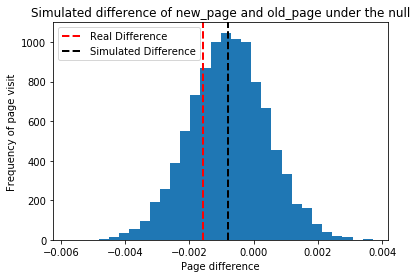

In [31]:
plt.hist(p_diffs, bins=30);
plt.title('Simulated difference of new_page and old_page under the null')
plt.xlabel('Page difference')
plt.ylabel('Frequency of page visit')
plt.axvline(x=p_new-p_old, color='r', linestyle='dashed', linewidth=2, label='Real Difference')
plt.axvline(x=np.array(p_diffs).mean(), color='black', linestyle='dashed', linewidth=2, label='Simulated Difference')
plt.legend()
plt.show();

Using the smulation for 10,000 iterations results in a sampling distribution that is normally distributed with the mean of the distribution at -0.00078287798702429863, almost near to 0.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
# From real data, calculate the difference
p_diff = p_new - p_old

In [43]:
# From the simulation
# finding the values in our sample that are greater than actual difference p_diff
greater_than_p_diff = [i for i in p_diffs if i > p_diff]

# how many less than zero
less_than_zero = [i for i in p_diffs if i < 0]
print("number of elements less than zero is {} of the total {}".format(len(less_than_zero), len(p_diffs)))

number of elements less than zero is 7479 of the total 10000


In [40]:
# proportion of values
proportion_greater = len(greater_than_p_diff) / len(p_diffs)
print('Proportion greater than the actual differnce is ', proportion_greater)
print('In terms of percentage: ', proportion_greater *100)
print('Actual difference: ', p_diff)

Proportion greater than the actual differnce is  0.7476
In terms of percentage:  74.76
Actual difference:  -0.0015790565976871451


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In our sample, we can see the 74.76% of our population is greates than the actual difference. Under the null hypothesis, where we state that p_new - p_old is less than or equal to zero, 7479 samples of our population confirm with our null hypotheses being true, which is 74.79% of our population are less than or equal to zero. So from this model, it shows that old page does better than the new page**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [48]:
import statsmodels.api as sm
# calculate the number of conversion for each page

convert_old = df2.query('landing_page == "old_page" and converted == "1"').shape[0]
convert_new = df2.query('landing_page == "new_page" and converted == "1"').shape[0]

print('convert_old', convert_old,
     '\nconvert_new ', convert_new,
     '\nn_new', n_new,
     '\nn_old', n_old)


convert_old 17489 
convert_new  17264 
n_new 145311 
n_old 145274


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [52]:
# Find z-score and p-value
#Function as below
# proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
# number of successes Eg: [135, 47] for the count parameter, and number of trials Eg:[1781, 1443] for the nobs parameter.
z_score, p_value = sm.stats.proportions_ztest(count=[convert_new, convert_old], nobs=[n_new, n_old])
print("z-score:", z_score,
      "\np-value:", p_value)

z-score: -1.31160753391 
p-value: 0.189652589719


Let's say our significnace level is at 95%. Since this is a test for the difference, it's a two-tail test so a z-score past -1.96 or 1.96 will be significant.

In [53]:
# Using scipy to test significance of our z_score
from scipy.stats import norm
norm.cdf(z_score)  # significance of our z_score

0.094826294859409022

In [54]:
# what our critical value at 95% confidence is
norm.ppf(1-(0.05/2))

1.959963984540054

***Our z_score of -1.31160753391 is less than the critical value at 95% confidence which is 1.959963984540054, so we stay with our null hypothesis. Or in other words our landing page_old(convert_old / n_old) i.e 17,489 / 145,274 is more statiscally significant than landing_page_new(convert_new / n_new) i.e 17,264 / 145,311.
Additionally the p-value of 0.189652589719, as it is a not closer to 1 should be more in favour of the null hypothesis***

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Our z_score of -1.31160753391 is less than the critical value at 95% confidence which is 1.959963984540054, so we stay with our null hypothesis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [9]:
# create a clone of your dataframe df2 in case of any errors
df3 = df2.copy()

In [10]:
# Adding 2 columns - 'intercept' and 'ab_page' - which will be 1 if the individual receives the treatment and 0 if control.
# So theses are our dummy variables, representative of the categorical variables group

# first identify the indexes for which we need to insert 1, the rest will be 0
indexes_insert_1 = df3.query('group == "treatment"').index

# Set the values for the new columns that will be added
# DataFrame.set_value(index, col, value, takeable=False)[source]
df3.set_value(index = indexes_insert_1, col ='abs_page', value=1) # sets value 1 only for the selected indexes
df3.set_value(index = df3.index, col ='intercept', value=1) # sets value 1 for all rows with no preselected indexes
df3.head()

# Check for NaN values and replace them zeros or else this will impact the Logisitic Regression model
#check null values
df3.isnull().sum()

user_id              0
timestamp            0
group                0
landing_page         0
converted            0
abs_page        145274
intercept            0
dtype: int64

In [11]:
# replace NaN values with zero in abs_page or else the regression model will not work
df3.fillna(0, inplace=True)
df3.head()
df3.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
abs_page        0
intercept       0
dtype: int64

In [101]:
# validating the changes
df3[df3['group'] == 'treatment'].head(3)

,user_id,timestamp,group,landing_page,converted,abs_page,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1.0,1.0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1.0,1.0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1.0,1.0


In [12]:
# moving the response we are trying to predict to the right most side as otherwise there was some index related errors
# in the LR model
col_list = df3.columns.tolist()
col_list.pop(col_list.index('converted'))
col_list
df3[col_list].head()
df3 = df3[col_list + ['converted']]
df3[df3['group'] == 'treatment'].head()

,user_id,timestamp,group,landing_page,abs_page,intercept,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,1.0,1.0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,1.0,1.0,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1.0,1.0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1.0,1.0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1.0,1.0,1


In [130]:
df3.dtypes

user_id           int64
timestamp        object
group            object
landing_page     object
abs_page        float64
intercept       float64
converted         int64
dtype: object

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [23]:
# Setup the logistic regression model
import statsmodels.api as sm
log_model = sm.Logit(df3['converted'], df3[['intercept','abs_page']])
results = log_model.fit()

C:\Users\dkaithav\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [132]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Wed, 28 Feb 2018   Pseudo R-squ.:               8.085e-06
Time:                        18:45:21   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
abs_page      -0.0150      0.011     -1.312      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**p_value from the Logistic regression model for ab_page is 0.190
  p_value as calculates from the z_test is 0.189, which closely matches
  The slight difference could have been due to to the intercept that we added for the regression model as against the
  the z-test, where we didn't**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding new features will help along as the features that are added are independent. If we add related features to the existing model, coefficients cannot be correctly interpreted and may result in misinterpretation. I think in this case, the regression is modeled using the abs_page column which is actually interpreting the combination of the group and in turn the landing page as data has been wrangled such that users from treatment group have new_page as the landing_page**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [14]:
#importing data
countries_df = pd.read_csv('countries.csv')
countries_df.head(5)

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [15]:
#Merging the two datframes - countries_df and the df3 dataframe on the 'user_id' column which will set as index for both
#dataframes to merge

df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')
# another way of doing would be to use the merge function
# result = pd.merge(left, right, how='inner', on=['key1', 'key2'])
#df_new_1 = pd.merge(countries_df, df3, how='inner', on='user_id')
#df_new_1.head()
df_new.head()

,country,timestamp,group,landing_page,abs_page,intercept,converted
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0.0,1.0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,1.0,1.0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1.0,1.0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0.0,1.0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,1.0,1.0,0


In [16]:
df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [19]:
### Create the necessary dummy variables
# for the countries
# pandas.get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
# data : array-like, Series, or DataFrame
# columns: Column names in the DataFrame to be encoded


# create a copy of df_new
df4 = df_new.copy()
df4 = pd.get_dummies(df_new, columns=['country'])
df4.head()

# moving the 'converted column to the last column
cols = df4.columns.tolist()
# identify the indexes of the column to be removed
cols.pop(cols.index('converted'))

# removed 'converted' and verified
cols

# add it to the last column
df4 = df4[cols + ['converted']]
#df4.reset_index(inplace=True)
df4.head()

,timestamp,group,landing_page,abs_page,intercept,country_CA,country_UK,country_US,converted
user_id,,,,,,,,,
834778,2017-01-14 23:08:43.304998,control,old_page,0.0,1.0,0,1,0,0
928468,2017-01-23 14:44:16.387854,treatment,new_page,1.0,1.0,0,0,1,0
822059,2017-01-16 14:04:14.719771,treatment,new_page,1.0,1.0,0,1,0,1
711597,2017-01-22 03:14:24.763511,control,old_page,0.0,1.0,0,1,0,0
710616,2017-01-16 13:14:44.000513,treatment,new_page,1.0,1.0,0,1,0,0


In [20]:
# looking at the datatypes
df4.dtypes
# will see later if the datatype needs to be changed

timestamp        object
group            object
landing_page     object
abs_page        float64
intercept       float64
country_CA        uint8
country_UK        uint8
country_US        uint8
converted         int64
dtype: object

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [ ]:
### Fit Your Linear Model And Obtain the Results

In [24]:
# Create a logit model based on countries taking country_CA as the baseline

logit_countries_model = sm.Logit(df4['converted'], df4[['country_UK', 'country_US', 'intercept']])
results_countries = logit_countries_model.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [205]:
results_countries.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            2
Date:                Wed, 28 Feb 2018   Pseudo R-squ.:               1.521e-05
Time:                        20:23:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
==============================================================================
"""

In [25]:
## Create a logit model based on countries taking country_CA as the baseline and abs_page

logit_countries_model2 = sm.Logit(df4['converted'], df4[['abs_page','country_UK', 'country_US', 'intercept']])
results_countries_2 = logit_countries_model2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [208]:
results_countries_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Wed, 28 Feb 2018   Pseudo R-squ.:               2.324e-05
Time:                        20:25:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
abs_page      -0.0150      0.011     -1.308      0.191      -0.037       0.007
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
==============================================================================
"""

In [30]:
# interpreting the summary
uk, us, abs_pg = 1/np.exp(0.0506), 1/np.exp(0.0408), 1/np.exp(-0.0150)
uk,us, abs_pg

(0.95065885803307093, 0.96002111497165088, 1.0151130646157189)

In [31]:
#for abs_page
np.exp(-0.0150)

0.98511193960306265

In [ ]:
# For every 1 page less that is converted, it is 95.06% as likely to be a viewer from UK than it is from CA
# For every 1 page less that is converted, it is 96% as likely to be a viewer from US than it is from CA
# For every 1 page that is coverted, it is 98.5% as likely to be from the 'treatment' group.

<a id='conclusions'></a>
## Conclusions

Although there is some difference in the conversion rate for old and new pages, our regession models have not have not given evidence to reject the null hypothesis. Thus the null hypothesis stands and the conversion rate for the old page is higher than the old page. The data provided is quite fair in the sense that the probability fo a viewer falling into either groups is almost 50% and so the validity of the null hypothesis stands due to the conversion rate being higher for the old page than the new page. The regression models, z-test have indicated the the same. Based on what we have seen from the data and the models, the ecommerce website should reconsider using the new web page as there is  no significant improvement witnessed

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.